# Libraries

In [7]:
import pandas as pd

import random
import math
import numpy as np

import seaborn as sns
from scipy.integrate import odeint

from IPython import display
from IPython.display import HTML

import matplotlib as mpl
from matplotlib import cm
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib inline

from scipy.ndimage import gaussian_filter

import matplotlib.animation as manimation; manimation.writers.list()

In [8]:
class particle:

    def __init__(self, size, x, y, v):

        # components of inner energy
        self.size = size
        self.rotation = random.uniform(0, 1)

        self.position = [x, y]
        self.velocity = [v[0], v[1]]
        # inner_energy?
        # outer_energy?

        #connections
        self.associations = []

    def update(self):
        self.position[0] += self.velocity[0]
        self.position[1] += self.velocity[1]

    def interaction(self, particle):
        size_coef = max(particle.size / self.size,1)
        dist_coef = (np.sqrt((particle.position[0] - self.position[0])**2 + (particle.position[1] - self.position[1])**2)**2)
        r1 = self.rotation * (2*np.pi)
        r2 = particle.rotation * (2*np.pi)
        rot_coef = round((np.cos(r2) * np.cos(r1)) + (np.sin(r2) * np.sin(r1)),4)
        force_coef = size_coef * rot_coef
        self.velocity[0] = self.velocity[0] + force_coef * (particle.position[0] - self.position[0])/(dist_coef**1.5)
        self.velocity[1] = self.velocity[1] + force_coef * (particle.position[1] - self.position[1])/(dist_coef**1.5)

        # self-destruct and divide
        # absorb
        # emission



class p_field:

    def __init__(self, x, y, p):

        # Take coordinates and shape them into a mesh-map
        self.width_x = x
        self.width_y = y
        self._field = np.zeros((self.width_x, self.width_y))

        self.x_coords = np.linspace(0-x, 0+x, self.width_x)
        self.y_coords = np.linspace(0-y, 0+y, self.width_y)
        self.X, self.Y = np.meshgrid(self.x_coords, self.y_coords)

        # Given the coordinate map, update with appropriate curvature
        for _p in p:
            strength = np.sign(np.cos(_p.rotation*2*np.pi))
            spread = _p.size * 200
            X_c = _p.position[0] #np.random.normal(abs(_p.position[0]), /2, 1)[0]
            Y_c = _p.position[1] #np.random.normal(abs(_p.position[0]), abs(_p.position[1])/2, 1)[0]

            self._field += strength * np.exp(-((self.X - X_c)**2 + (self.Y - Y_c)**2) / spread**2)   # Central well

        self._field = gaussian_filter(self._field, sigma=0.5)


        # expansion rate
        # time


# Simulation

In [9]:
p = []
n = 5
for _ in range(n):
    size = abs(np.random.normal(0, 1, 1)[0])
    x = np.random.normal(0, 500, 1)[0]
    y = np.random.normal(0, 500, 1)[0]
    v_x = 0 #np.random.normal(0, 10, 1)[0]
    v_y = 0 #np.random.normal(0, 10, 1)[0]

    a = particle(size, x, y,[v_x,v_y])
    p.append(a)

width_x = 2000
width_y = 2000

In [11]:
def update(frame):
    
    ax.clear()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_xlim(-width_x, width_x,)
    ax.set_ylim(-width_y, width_y)
    ax.set_aspect('equal', adjustable='box') # Ensure square pixels

    field = p_field(width_x, width_y, p)    
    ax.imshow(field._field, origin='lower', cmap='coolwarm', alpha=0.3,extent=[-width_x, width_x, -width_y, width_y])
    for _p in p:

        if np.cos(_p.rotation*(2*np.pi)) < 0:
            inter = abs(np.cos(_p.rotation*(2*np.pi)))
            clr = 'blue'
        else:
            inter = abs(np.cos(_p.rotation*(2*np.pi)))
            clr = 'red'

        ax.scatter(_p.position[0], _p.position[1], color = clr, alpha = inter)
        _p.update()

        for _p2 in p:
            if _p != _p2:
                _p.interaction(_p2)
    
    

    

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=100)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# objects

In [18]:
rng = np.random.default_rng(156421)
nfr = 30 # Number of frames
time = 100 #time for the animation
fpss = nfr/(time/5) #frames per second, due to above

#expansion of space
space0 = 100 #initial size of space
A = 1.1 #velocity of space expanding
n = 100

#galaxy 1
rng = np.random.default_rng(7)
c1 = [-25,0,-10]
v1 = [0,0,0]
x1 = np.random.normal(c1[0], 10, n)
y1 = np.random.normal(c1[1], 7.8, n)
z1 = np.random.normal(c1[2], 0.1, n) # - space0 + 1
r1 = np.sqrt((x1-c1[0])**2+(y1-c1[1])**2)
theta1 = rng.integers(low=0, high=360, size=n)
psy1 = rng.integers(low=0, high=360, size=1)*np.pi/360

#galaxy 2
rng = np.random.default_rng(3)
c2 = [30,20,-15]
v2 = [0,0,0]
x2 = np.random.normal(c2[0], 10, n)
y2 = np.random.normal(c2[1], 7.8, n)
z2 = np.random.normal(c2[2], 0.25, n) # - space0 + 1
r2 = np.sqrt((x2-c2[0])**2+(y2-c2[1])**2)
theta2 = rng.integers(low=0, high=360, size=n)
psy2 = rng.integers(low=0, high=360, size=1)*np.pi/360

#galaxy 3
rng = np.random.default_rng(2123)
c3 = [-20,-30,30]
v3 = [0,0,0]
x3 = np.random.normal(c3[0], 10, n)
y3 = np.random.normal(c3[1], 7.8, n)
z3 = np.random.normal(c3[2], 5, n) # - space0 + 1
r3 = np.sqrt((x3-c3[0])**2+(y3-c3[1])**2)
theta3 = rng.integers(low=0, high=360, size=n)
psy3 = rng.integers(low=0, high=360, size=1)*np.pi/360

## Animation function

In [19]:
def animate_func(num):
    ax.clear()
    expansion = space0 
    
    
    # for each particle
    for item in range(len(x1)):        

        x1[item] = c1[0] + v1[0]*num + (r1[item]) * ( math.cos( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1) 
        y1[item] = c1[1] + v1[1]*num + (r1[item]) * ( math.sin( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1)
        z1[item] = c1[2] + v1[2]*num + (r1[item]) * ( math.cos( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.cos(psy1)  
        #
        x2[item] = c2[0] + v2[0]*num + (r2[item]) * ( math.cos( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.sin(psy2) 
        y2[item] = c2[1] + v2[1]*num + (r2[item]) * ( math.sin( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.sin(psy2)
        z2[item] = c2[2] + v2[2]*num + (r2[item]) * ( math.cos( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.cos(psy2)
        #
        x3[item] = c3[0] + v3[0]*num + (r3[item]) * ( math.cos( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.sin(psy3) 
        y3[item] = c3[1] + v3[1]*num + (r3[item]) * ( math.sin( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.sin(psy3)
        z3[item] = c3[2] + v3[2]*num + (r3[item]) * ( math.cos( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.cos(psy3)

        #(t/24)*(2.1/np.sqrt(r[item])-0.4/r[item] + 0.8*r[item]**0.75)/2.5
        
    r11 = 1/np.sqrt(r1+0.01)
    dataSet1 = np.array([x1, y1, z1]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet1[0, :n], dataSet1[1, :n], dataSet1[2, :n], c=r11, s=5, cmap='cividis', norm = normalize)
    
    r22 = 1/np.sqrt(r2+0.01)
    dataSet2 = np.array([x2, y2, z2]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet2[0, :n], dataSet2[1, :n], dataSet2[2, :n], c=r22, s=5, cmap='cividis', norm = normalize)
    
    r33 = 1/np.sqrt(r3+0.01)
    dataSet3 = np.array([x3, y3, z3]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet3[0, :n], dataSet3[1, :n], dataSet3[2, :n], c=r33, s=5, cmap='cividis', norm = normalize)
    
    # Setting Axes Limits
    ax.set_xlim(-expansion, expansion)
    ax.set_ylim(-expansion, expansion)
    ax.set_zlim(-expansion, expansion)

    # Adding Figure Labels
    ax.set_title('Galaxy SIM \nTime = ' + str(np.round(num/20, decimals=1)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

## Animation

In [20]:
##########################################################################################################
# Plotting the Animation
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_box_aspect([1,1,1])   
ax.view_init(20, 45)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

###########################################################################################################
anim = animation.FuncAnimation(fig, animate_func, interval=time,   frames=nfr)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

# Saving the Animation
#f = r"C:\Users\Markb\galaxy.gif"
#writergif = animation.PillowWriter(fps=fpss)
#anim.save(f, writer=writergif)

#anim.save('galaxy.mp4', fps=fpss, extra_args=['-vcodec', 'libx264'])

C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\1724606876.py:10: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.fill = False
C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\1724606876.py:11: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.fill = False
C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\1724606876.py:12: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.fill = False
C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\1724606876.py:13: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
C:\Users\Mark Brezina\AppData

## Other

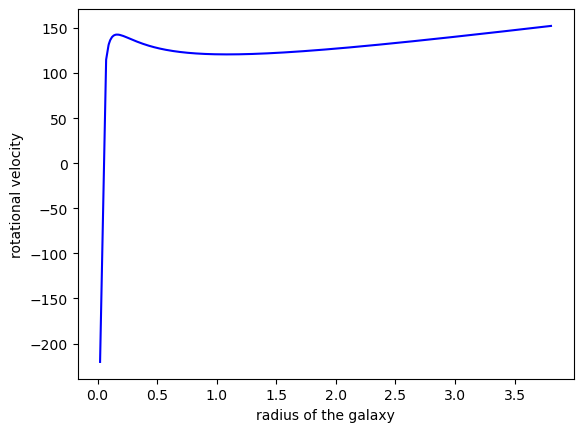

In [31]:
#expansion of space
space0 = 3 #initial size of space
A = 1.1 #velocity of space expanding

# particles
n = 1000
x = np.random.normal(0, 1.2, n)
y = np.random.normal(0, 0.8, n)
r = np.sqrt(x**2+y**2)
r.sort()
rng = np.random.default_rng(6452341)
theta = rng.integers(low=0, high=360, size=n)

X = range(0,n)
V = np.zeros(n)
    #for each particle
for t in range(0,30):
    for item in range(len(V)):
        #theta[item] = theta[item]
        V[item] = 100*(t/24)*(2.1/np.sqrt(r[item])-0.4/r[item] + 0.8*r[item]**0.75)/2.5# + 1/np.sqrt(max(r)-r[item])+0.01 )
        


#print(r)
#print(V)

fig = plt.figure()
ax = plt.subplot(111)
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(r,V, color='blue')
#ax = plt.axes()
#ax.set_facecolor('white') 
plt.xlabel("radius of the galaxy")
plt.ylabel("rotational velocity")
plt.savefig('galaxy_curve.png')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points


def f(x, y):
    return -10/np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.contour3D(X, Y, Z, 2000, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.view_init(20, 45)

In [21]:
#basic constants
m = 2
n = 20
mid = 1000
vm = 0

# lists
list_center = []
list_radius = []
v = []

#process of generating galaxies and stars
for i in range(m):
    c = [np.random.normal(0, 200, 1)[0], np.random.normal(0, 200, 1)[0], np.random.normal(0, 10, 1)[0]]
    for i in range(n):
        x1 = np.random.normal(c[0], 50, 1)[0]
        y1 = np.random.normal(c[1], 50, 1)[0]
        z1 = np.random.normal(c[2], 50, 1)[0]
        q1 = abs(np.random.normal(mid, 0.01*mid, 1)[0])
        q2 = -abs(np.random.normal(mid, 0.01*mid, 1)[0])
        list_center.append([x1,y1,z1,q1,q2])
        vx = np.random.normal(vm, 0.05, 1)[0]
        vy = np.random.normal(vm, 0.05, 1)[0]
        vz = np.random.normal(vm, 0.05, 1)[0]
        v.append([vx,vy,vz])
        list_radius.append(abs(np.random.normal(10, 0.5, 1)[0]))


In [22]:
#for i in range(len(list_center)):
sume = abs( list_center[0][3] ) + abs( list_center[0][4] ) + abs( list_center[1][3] ) + abs( list_center[1][4] )
R = np.sqrt( (list_center[0][0]-list_center[1][0])**2 + (list_center[0][1]-list_center[1][1])**2 + (list_center[0][2]-list_center[1][2])**2 )
print("radius", R)
att = (list_center[0][3] + list_center[1][4] + list_center[1][3] + list_center[0][4]) / np.sqrt(sume)
rep = (list_center[0][3] + list_center[1][3] + list_center[0][4] + list_center[1][4]) / np.sqrt(sume)
print("attractive force: ", att)
print("attractive force w R: ", att/np.sqrt(R))
print("repulsive force: ", rep)
print("repulsive force w R: ", rep/np.sqrt(R))
force = rep / np.sqrt(R) + att / np.sqrt(R) # + 0.0001*np.sqrt(R) - 100/np.sqrt(R)
print("the force between the particles is: ",force, "and the X velocity of particle one is: ", v[0][0] + (list_center[0][0]-list_center[1][0])/R * force)


radius 100.43435227584844
attractive force:  0.6888855472299984
attractive force w R:  0.06873943083716795
repulsive force:  0.6888855472300002
repulsive force w R:  0.06873943083716813
the force between the particles is:  0.1374788616743361 and the X velocity of particle one is:  -0.12055233966492936


In [23]:
def move(time):
    for _ in range(time):
        
        for i in range(len(list_center)):

            for j in range(len(list_center)):
                if i == j:
                    next
                elif i != j:
                    sume = abs( list_center[i][3] ) + abs( list_center[i][4] ) + abs( list_center[j][3] ) + abs( list_center[j][4] )
                    R = np.sqrt( (list_center[i][0]-list_center[j][0])**2 + (list_center[i][1]-list_center[j][1])**2 + (list_center[i][2]-list_center[j][2])**2 )

                    rep = ((list_center[i][3]*list_center[j][3]) + (list_center[i][4]*list_center[j][4])) / np.sqrt(sume)

                    att = ((list_center[i][4]*list_center[j][3]) + (list_center[i][3]*list_center[j][4])) / np.sqrt(sume)

                    force = rep / np.sqrt(R) + att / np.sqrt(R) #+ 0.0001*np.sqrt(R) - 100/np.sqrt(R)
                    
                    v[i][0] = v[i][0] + (list_center[i][0]-list_center[j][0])/R * force
                    v[i][1] = v[i][1] + (list_center[i][1]-list_center[j][1])/R * force
                    v[i][2] = v[i][2] + (list_center[i][2]-list_center[j][2])/R * force
                                
                    #if R < list_radius[i]:
                        #list_center[i][3] = list_center[i][3] + list_center[j][3]
                        #list_center[i][4] = list_center[i][4] + list_center[j][4]
                        #v[i][0] = v[i][0] + v[j][0]
                        #v[i][1] = v[i][1] + v[j][1]
                        #v[i][2] = v[i][2] + v[j][2]
                        
                        #list_center[j][3] = 0
                        #list_center[j][4] = 0
                        #v[i][0] = 0
                        #v[i][1] = 0
                        #v[i][2] = 0
                        
                        #v[j][0] = 0
                        #v[j][1] = 0
                        #v[j][2] = 0
                        #list_radius[j] = 0.01
                       
                    #elif R > list_radius[i]:


                    

            list_center[i][0] = list_center[i][0] + v[i][0]
            list_center[i][1] = list_center[i][1] + v[i][1]
            list_center[i][2] = list_center[i][2] + v[i][2]
       #end particle loops     
            
#end time loop
    return(list_center) 

In [ ]:
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point
    
    #draw spheres
    for c, r in zip(list_center, list_radius):
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        x = r*np.cos(u)*np.sin(v)
        y = r*np.sin(u)*np.sin(v)
        z = r*np.cos(v)
        ax.plot_surface(x-c[0], y-c[1], z-c[2], color = "white")
    
    expansion = 500
    #x,y,z limits
    ax.set_xlim(-expansion, expansion)
    ax.set_ylim(-expansion, expansion)
    ax.set_zlim(-expansion, expansion)
    move(1)

###########################################################################################################
# Plotting the Animation
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_box_aspect([1,1,1])   
ax.view_init(20, 40)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False)


ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
###########################################################################################################

anim = animation.FuncAnimation(fig, animate_func, interval=100,   frames=260)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 


C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\2480436568.py:30: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.fill = False
C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\2480436568.py:31: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.fill = False
C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\2480436568.py:32: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.fill = False
C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_11312\2480436568.py:33: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
C:\Users\Mark Brezina\AppData